## Hill climbin algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### a) Maximize Entropy

In [2]:
def entropy(x):
    return -np.sum(x*np.log(x))

In [3]:
def entropy_variance(y, lamb=-0.01):
    x = np.arange(-50, 51)
    variance = np.average(x**2, weights=y) - np.average(x, weights=y)**2
    return entropy(y) - lamb * variance

In [4]:
support = range(-50, 51)

In [5]:
def hill_climbing(x, score, step_size, eps, max_iter=10**4):
    current_x = x
    step = [step_size, -step_size]
    max_score = float('-inf')
    k = 0
    while True:
        initial_score = score(current_x)
        for i in range(len(x)):
            for j in range(len(step)):
                current_x[i] = current_x[i] + step[j]
                nom_x = current_x/np.sum(current_x)
                current_score = score(nom_x)
                current_x[i] = current_x[i] - step[j]
                if current_score > max_score:
                    max_score = current_score
                    best = j
            current_x[i] = current_x[i] + step[best]
            current_x = current_x/np.sum(current_x)
        k += 1
        if np.abs(current_score - initial_score) < eps or k == max_iter:
            print('iteration: ', k)
            return max_score, current_x

In [6]:
p = np.random.normal(1, 0.2, len(support))
p = p/np.sum(p)

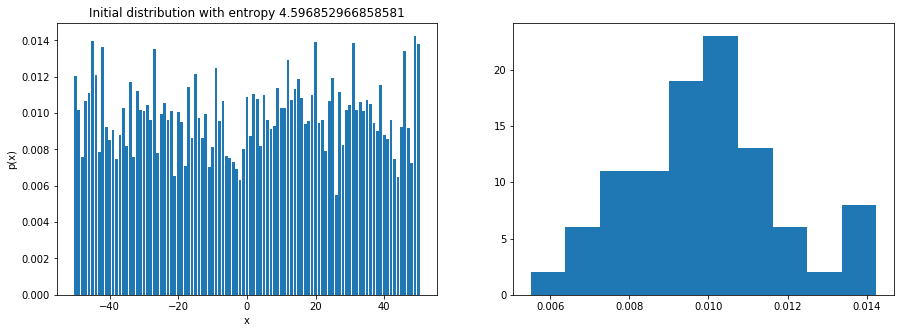

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].bar(support, p)
ax[0].set_xlabel('x')
ax[0].set_ylabel('p(x)')
ax[0].set_title('Initial distribution with entropy {0}'.format(entropy(p)))
ax[1].hist(p)
plt.show()

iteration:  289


Text(0.5,1,'Maximized entropy 4.614661793501696')

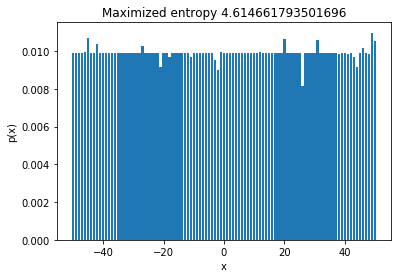

In [8]:
max_entropy, values = hill_climbing(p, entropy, 10**-5, 10**-5)
plt.bar(support, values)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Maximized entropy {0}'.format(max_entropy))

### b) Maximize:  H(X) + λ*V(X)  for λ=0.01

In [ ]:
max_entropy_variance, values2 = hill_climbing(p, entropy_variance, 10**-5, 10**-5)
plt.bar(support, values2)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(max_entropy_variance)

In [ ]:
print(np.var(values2))

### c) Kullback–Leibler divergence